Nama : Aulia Riris Amanda
NIM : 191220056
Kelas : 10
Matkul : Data Mining (UAS)

In [12]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.testing as tm

In [13]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [14]:
data = pd.read_csv ('international_matches.csv')
data

date       home_team     away_team home_team_continent  \
0      1993-08-08         Bolivia       Uruguay       South America   
1      1993-08-08          Brazil        Mexico       South America   
2      1993-08-08         Ecuador     Venezuela       South America   
3      1993-08-08          Guinea  Sierra Leone              Africa   
4      1993-08-08        Paraguay     Argentina       South America   
...           ...             ...           ...                 ...   
23916  2022-06-14         Moldova       Andorra              Europe   
23917  2022-06-14   Liechtenstein        Latvia              Europe   
23918  2022-06-14           Chile         Ghana       South America   
23919  2022-06-14           Japan       Tunisia                Asia   
23920  2022-06-14  Korea Republic         Egypt                Asia   

      away_team_continent  home_team_fifa_rank  away_team_fifa_rank  \
0           South America                   59                   22   
1           North America                    8                   14   
2           South America                   35                   94   
3                  Africa                   65                   86   
4           South America                   67                    5   
...                   ...                  ...                  ...   
23916              Europe                  180                  153   
23917              Europe                  192                  135   
23918              Africa                   28                   60   
23919              Africa                   23                   35   
23920              Africa                   29                   32   

       home_team_total_fifa_points  away_team_total_fifa_points  \
0                                0                            0   
1                                0                            0   
2                                0                            0   
3                                0                            0   
4                                0                            0   
...                            ...                          ...   
23916                          932                         1040   
23917                          895                         1105   
23918                         1526                         1387   
23919                         1553                         1499   
23920                         1519                         1500   

       home_team_score  ...  shoot_out home_team_result  \
0                    3  ...         No              Win   
1                    1  ...         No             Draw   
2                    5  ...         No              Win   
3                    1  ...         No              Win   
4                    1  ...         No             Lose   
...                ...  ...        ...              ...   
23916                2  ...         No              Win   
23917                0  ...         No             Lose   
23918                0  ...        Yes             Lose   
23919                0  ...         No             Lose   
23920                4  ...         No              Win   

      home_team_goalkeeper_score away_team_goalkeeper_score  \
0                            NaN                        NaN   
1                            NaN                        NaN   
2                            NaN                        NaN   
3                            NaN                        NaN   
4                            NaN                        NaN   
...                          ...                        ...   
23916                       65.0                        NaN   
23917                        NaN                       65.0   
23918                       79.0                       74.0   
23919                       73.0                        NaN   
23920                       75.0                        NaN   

       home_team_mean_defense_score 

In [15]:
data.describe()

home_team_fifa_rank  away_team_fifa_rank  home_team_total_fifa_points  \
count         23921.000000         23921.000000                 23921.000000   
mean             77.854688            80.797375                   323.401488   
std              52.355225            53.232902                   500.825725   
min               1.000000             1.000000                     0.000000   
25%              33.000000            36.000000                     0.000000   
50%              71.000000            73.000000                     0.000000   
75%             115.000000           119.000000                   547.000000   
max             211.000000           211.000000                  2164.000000   

       away_team_total_fifa_points  home_team_score  away_team_score  \
count                 23921.000000     23921.000000     23921.000000   
mean                    315.453576         1.609214         1.068266   
std                     490.944273         1.630127         1.263944   
min                       0.000000         0.000000         0.000000   
25%                       0.000000         0.000000         0.000000   
50%                       0.000000         1.000000         1.000000   
75%                     523.000000         2.000000         2.000000   
max                    2164.000000        31.000000        21.000000   

       home_team_goalkeeper_score  away_team_goalkeeper_score  \
count                 8379.000000                 8095.000000   
mean                    74.963838                   74.212477   
std                      8.212242                    8.225919   
min                     47.000000                   47.000000   
25%                     70.000000                   69.000000   
50%                     75.000000                   74.000000   
75%                     81.000000                   80.000000   
max                     97.000000                   97.000000   

       home_team_mean_defense_score  home_team_mean_offense_score  \
count                   7787.000000                   8510.000000   
mean                      74.903249                     75.818743   
std                        6.003114                      6.268416   
min                       52.800000                     53.300000   
25%                       71.000000                     71.700000   
50%                       75.200000                     75.700000   
75%                       78.800000                     80.000000   
max                       91.800000                     93.000000   

       home_team_mean_midfield_score  away_team_mean_defense_score  \
count                    8162.000000                   7564.000000   
mean                       75.889292                     74.424379   
std                         6.053110                      5.937425   
min                        54.200000                     52.800000   
25%                        72.500000                     70.500000   
50%                        76.200000                     74.500000   
75%                        79.500000                     78.200000   
max                        93.200000                     91.800000   

       away_team_mean_offense_score  away_team_mean_midfield_score  
count                   8312.000000                    7979.000000  
mean                      75.420019                      75.259143  
std                        6.201906                       6.124573  
min                       53.300000                      54.200000  
25%                       71.300000                      71.800000  
50%                       75.300000                      75.500000  
75%                       79.700000                      79.000000  
max                       93.000000                      93.200000

In [16]:
data.head()

date home_team     away_team home_team_continent away_team_continent  \
0  1993-08-08   Bolivia       Uruguay       South America       South America   
1  1993-08-08    Brazil        Mexico       South America       North America   
2  1993-08-08   Ecuador     Venezuela       South America       South America   
3  1993-08-08    Guinea  Sierra Leone              Africa              Africa   
4  1993-08-08  Paraguay     Argentina       South America       South America   

   home_team_fifa_rank  away_team_fifa_rank  home_team_total_fifa_points  \
0                   59                   22                            0   
1                    8                   14                            0   
2                   35                   94                            0   
3                   65                   86                            0   
4                   67                    5                            0   

   away_team_total_fifa_points  home_team_score  ...  shoot_out  \
0                            0                3  ...         No   
1                            0                1  ...         No   
2                            0                5  ...         No   
3                            0                1  ...         No   
4                            0                1  ...         No   

  home_team_result home_team_goalkeeper_score away_team_goalkeeper_score  \
0              Win                        NaN                        NaN   
1             Draw                        NaN                        NaN   
2              Win                        NaN                        NaN   
3              Win                        NaN                        NaN   
4             Lose                        NaN                        NaN   

   home_team_mean_defense_score home_team_mean_offense_score  \
0                           NaN                          NaN   
1                           NaN                          NaN   
2                           NaN                          NaN   
3                           NaN                          NaN   
4                           NaN                          NaN   

  home_team_mean_midfield_score  away_team_mean_defense_score  \
0                           NaN                           NaN   
1                           NaN                           NaN   
2                           NaN                           NaN   
3                           NaN                           NaN   
4                           NaN                           NaN   

   away_team_mean_offense_score  away_team_mean_midfield_score  
0                           NaN                            NaN  
1                           NaN                            NaN  
2                           NaN                            NaN  
3                           NaN                            NaN  
4                           NaN                            NaN  

[5 rows x 25 columns]

In [17]:
data.isna().sum()

date                                 0
home_team                            0
away_team                            0
home_team_continent                  0
away_team_continent                  0
home_team_fifa_rank                  0
away_team_fifa_rank                  0
home_team_total_fifa_points          0
away_team_total_fifa_points          0
home_team_score                      0
away_team_score                      0
tournament                           0
city                                 0
country                              0
neutral_location                     0
shoot_out                            0
home_team_result                     0
home_team_goalkeeper_score       15542
away_team_goalkeeper_score       15826
home_team_mean_defense_score     16134
home_team_mean_offense_score     15411
home_team_mean_midfield_score    15759
away_team_mean_defense_score     16357
away_team_mean_offense_score     15609
away_team_mean_midfield_score    15942
dtype: int64

In [18]:
data.drop("away_team_mean_defense_score", axis=1, inplace=True)

In [19]:
data.drop("home_team_goalkeeper_score", axis=1, inplace=True)

In [20]:
data.drop("away_team_goalkeeper_score", axis=1, inplace=True)

In [21]:
data.drop("home_team_mean_defense_score", axis=1, inplace=True)

In [22]:
data.drop("home_team_mean_offense_score", axis=1, inplace=True)

In [23]:
data.drop("home_team_mean_midfield_score", axis=1, inplace=True)

In [24]:
data.drop("away_team_mean_offense_score", axis=1, inplace=True)

In [25]:
data.drop("away_team_mean_midfield_score", axis=1, inplace=True)

In [26]:
data.drop("date", axis=1, inplace=True)

In [27]:
objList = data.select_dtypes(include = "object").columns
print (objList)

Index(['home_team', 'away_team', 'home_team_continent', 'away_team_continent',
       'tournament', 'city', 'country', 'shoot_out', 'home_team_result'],
      dtype='object')


In [28]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    data['home_team'] = le.fit_transform(data['home_team'].astype(str))
    data['away_team'] = le.fit_transform(data['away_team'].astype(str))
    data['home_team_continent'] = le.fit_transform(data['home_team_continent'].astype(str))
    data['away_team_continent'] = le.fit_transform(data['away_team_continent'].astype(str))
    data['tournament'] = le.fit_transform(data['tournament'].astype(str))
    data['city'] = le.fit_transform(data['city'].astype(str))
    data['country'] = le.fit_transform(data['country'].astype(str))
    data['shoot_out'] = le.fit_transform(data['shoot_out'].astype(str))
    data['home_team_result'] = le.fit_transform(data['home_team_result'].astype(str))

print (data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   home_team                    23921 non-null  int64
 1   away_team                    23921 non-null  int64
 2   home_team_continent          23921 non-null  int64
 3   away_team_continent          23921 non-null  int64
 4   home_team_fifa_rank          23921 non-null  int64
 5   away_team_fifa_rank          23921 non-null  int64
 6   home_team_total_fifa_points  23921 non-null  int64
 7   away_team_total_fifa_points  23921 non-null  int64
 8   home_team_score              23921 non-null  int64
 9   away_team_score              23921 non-null  int64
 10  tournament                   23921 non-null  int64
 11  city                         23921 non-null  int64
 12  country                      23921 non-null  int64
 13  neutral_location             23921 non-null  b

In [29]:
boolList = data.select_dtypes(include = "boolean").columns
print (boolList)

Index(['neutral_location'], dtype='object')


In [30]:
for feat in boolList:
    data['neutral_location'] = le.fit_transform(data['neutral_location'].astype(str))

print (data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   home_team                    23921 non-null  int64
 1   away_team                    23921 non-null  int64
 2   home_team_continent          23921 non-null  int64
 3   away_team_continent          23921 non-null  int64
 4   home_team_fifa_rank          23921 non-null  int64
 5   away_team_fifa_rank          23921 non-null  int64
 6   home_team_total_fifa_points  23921 non-null  int64
 7   away_team_total_fifa_points  23921 non-null  int64
 8   home_team_score              23921 non-null  int64
 9   away_team_score              23921 non-null  int64
 10  tournament                   23921 non-null  int64
 11  city                         23921 non-null  int64
 12  country                      23921 non-null  int64
 13  neutral_location             23921 non-null  i

In [31]:
data.keys()

Index(['home_team', 'away_team', 'home_team_continent', 'away_team_continent',
       'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_total_fifa_points', 'away_team_total_fifa_points',
       'home_team_score', 'away_team_score', 'tournament', 'city', 'country',
       'neutral_location', 'shoot_out', 'home_team_result'],
      dtype='object')

In [32]:
data.values

array([[ 74, 210,   5, ...,   0,   0,   2],
       [ 81, 174,   5, ...,   0,   0,   0],
       [129,  56,   5, ...,   0,   0,   2],
       ...,
       [109, 141,   5, ...,   1,   1,   1],
       [155, 146,   1, ...,   0,   0,   1],
       [  7, 131,   1, ...,   0,   0,   2]])

In [33]:
data.shape

(23921, 16)

In [34]:
#target distribusi
print(data.groupby('home_team_result').size())

home_team_result
0     5389
1     6771
2    11761
dtype: int64


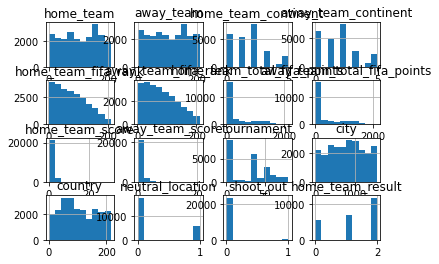

In [51]:
#histogram 
data.hist()
plt.show()

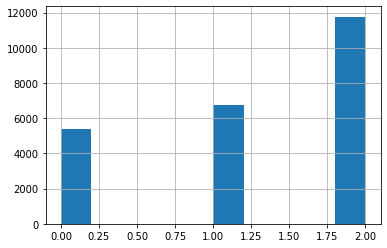

In [53]:
data['home_team_result'].hist()

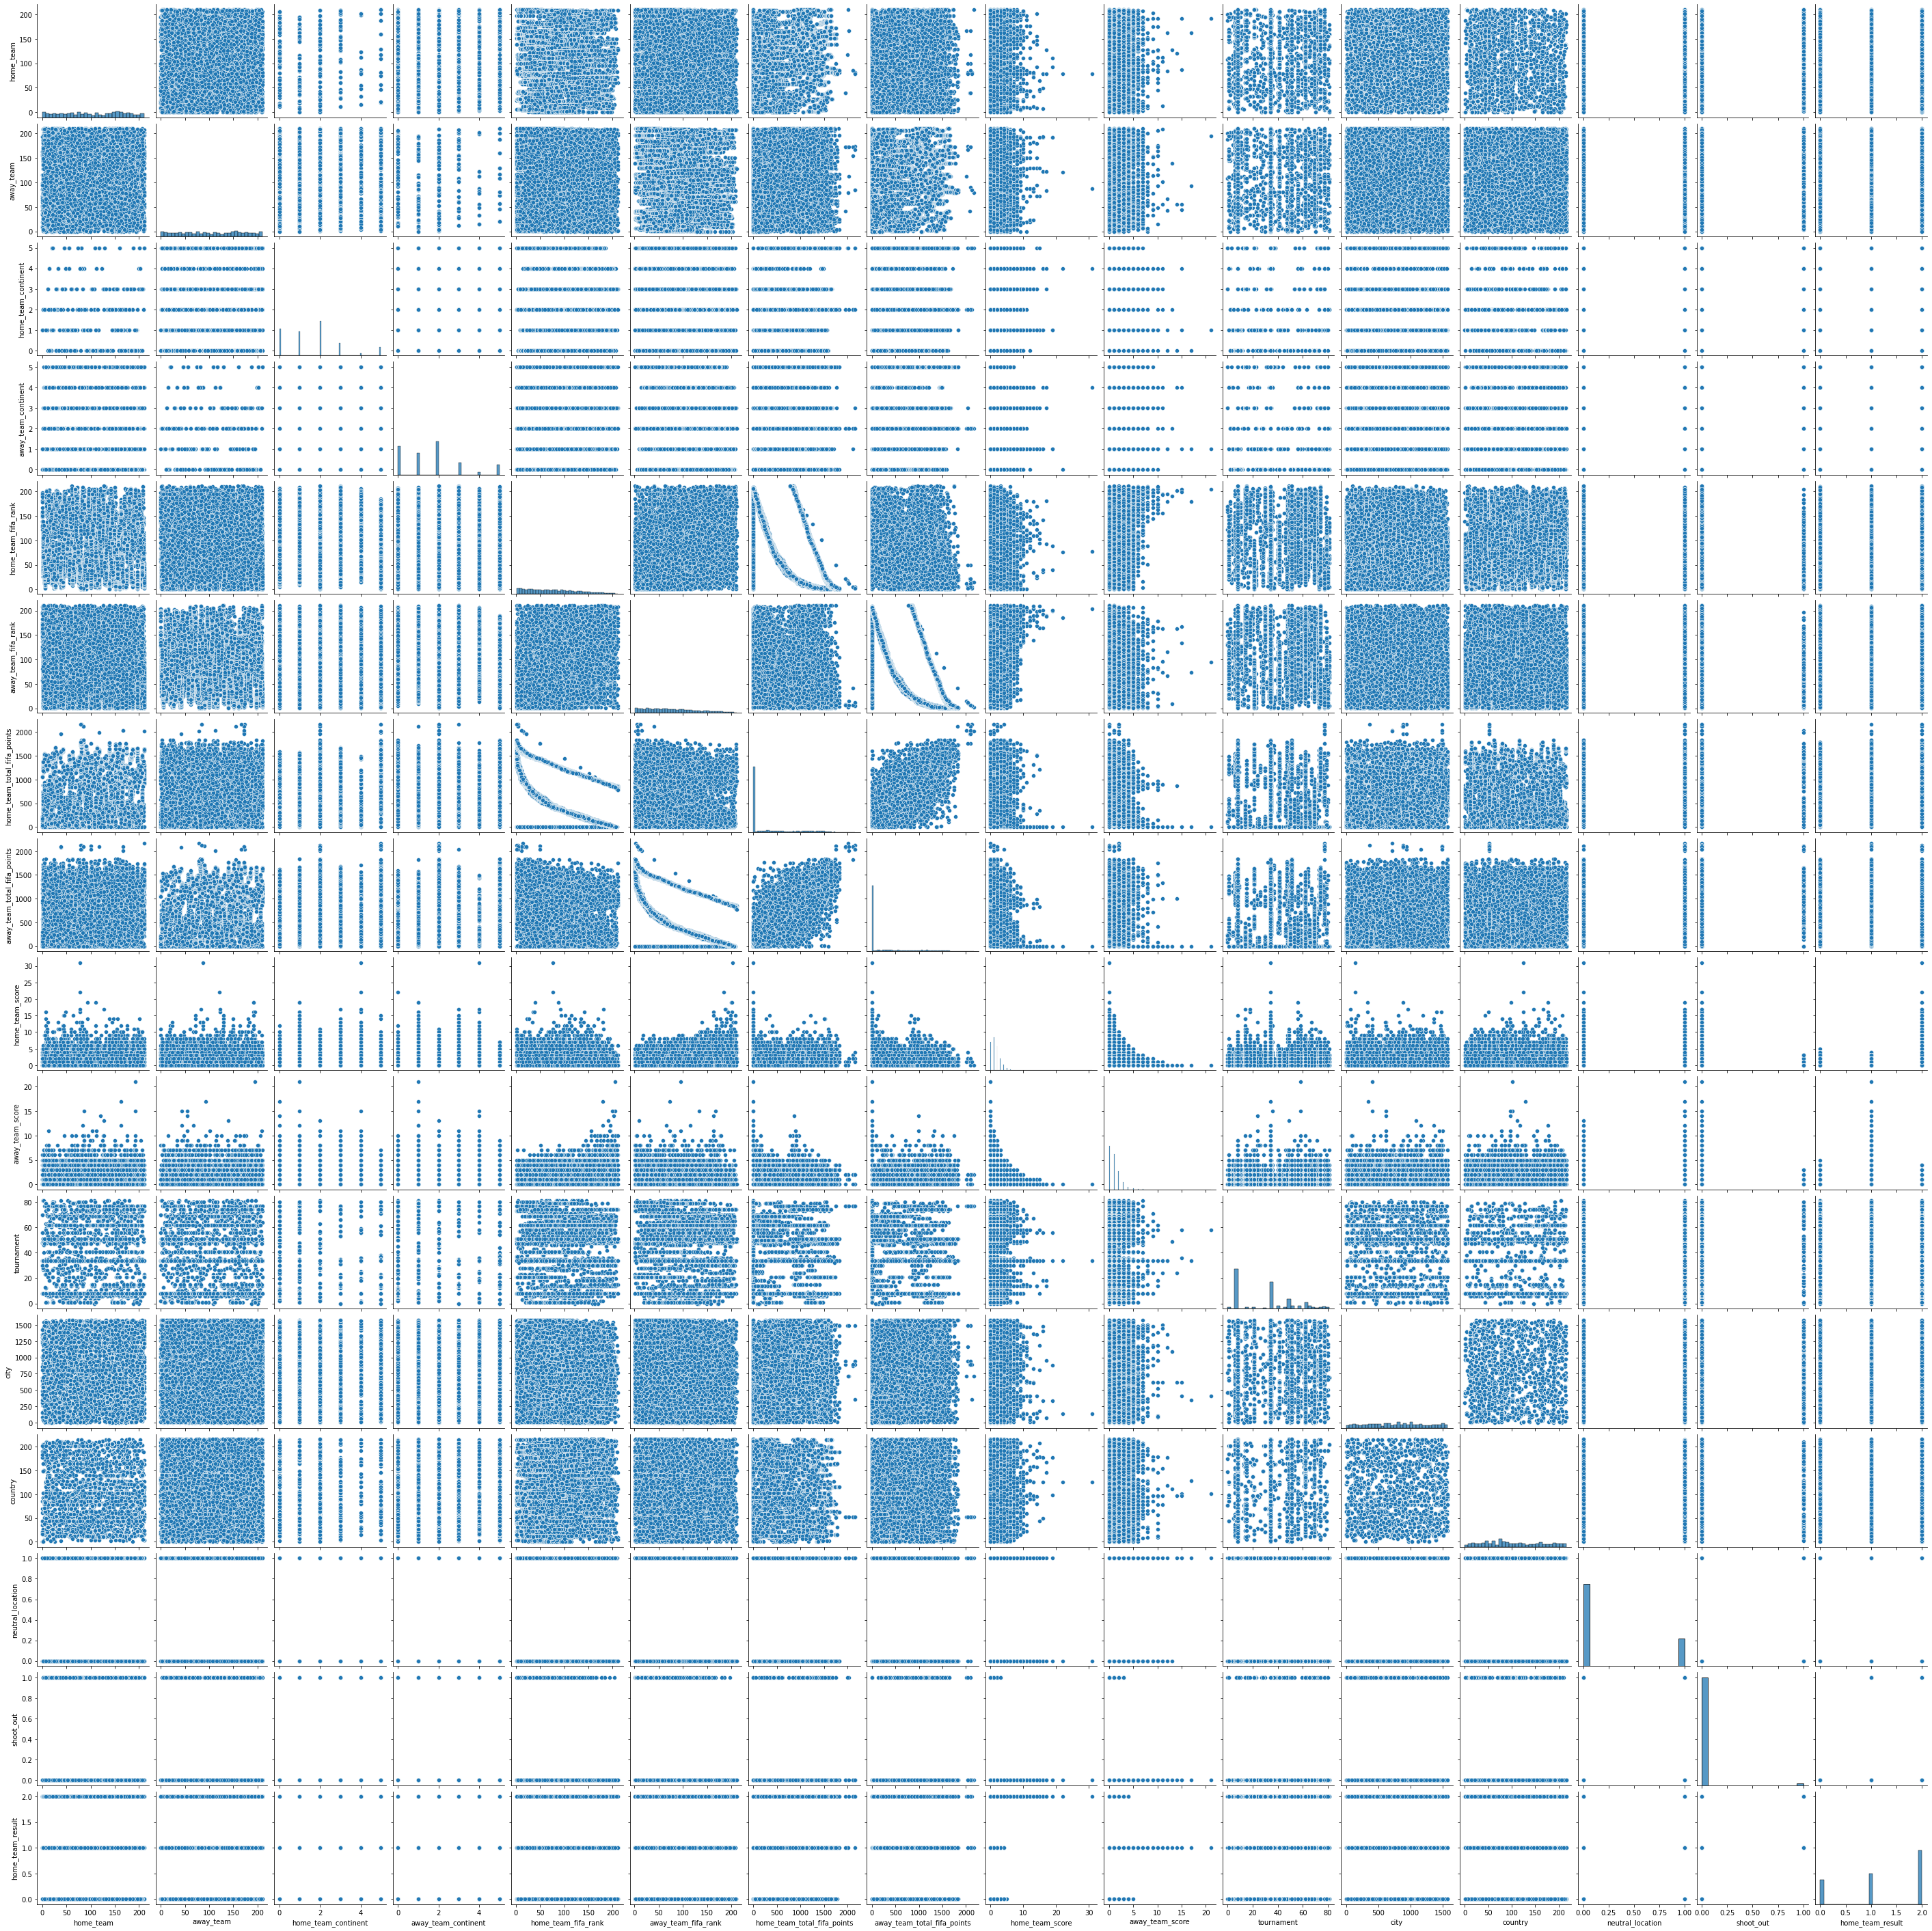

In [54]:
#multivariate plot
sns.pairplot(data)

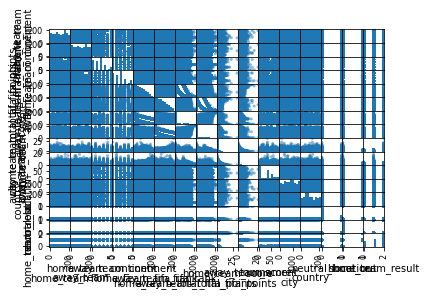

In [55]:
#scatter plot
from pandas.plotting import scatter_matrix
scatter_matrix(data)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


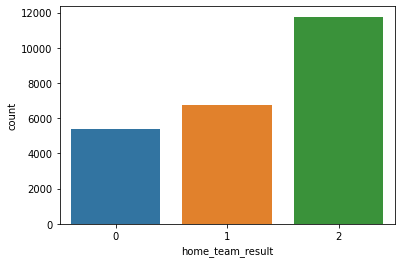

In [56]:
sns.countplot(data['home_team_result'])

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   home_team                    23921 non-null  int64
 1   away_team                    23921 non-null  int64
 2   home_team_continent          23921 non-null  int64
 3   away_team_continent          23921 non-null  int64
 4   home_team_fifa_rank          23921 non-null  int64
 5   away_team_fifa_rank          23921 non-null  int64
 6   home_team_total_fifa_points  23921 non-null  int64
 7   away_team_total_fifa_points  23921 non-null  int64
 8   home_team_score              23921 non-null  int64
 9   away_team_score              23921 non-null  int64
 10  tournament                   23921 non-null  int64
 11  city                         23921 non-null  int64
 12  country                      23921 non-null  int64
 13  neutral_location             23921 non-null  i

In [36]:
x = data.iloc[:,0:15]
y = data.iloc[:,15]
x

home_team  away_team  home_team_continent  away_team_continent  \
0             74        210                    5                    5   
1             81        174                    5                    3   
2            129         56                    5                    5   
3             14         34                    0                    0   
4             20        160                    5                    5   
...          ...        ...                  ...                  ...   
23916        179        107                    2                    2   
23917         13        196                    2                    2   
23918        109        141                    5                    0   
23919        155        146                    1                    0   
23920          7        131                    1                    0   

       home_team_fifa_rank  away_team_fifa_rank  home_team_total_fifa_points  \
0                       59                   22                            0   
1                        8                   14                            0   
2                       35                   94                            0   
3                       65                   86                            0   
4                       67                    5                            0   
...                    ...                  ...                          ...   
23916                  180                  153                          932   
23917                  192                  135                          895   
23918                   28                   60                         1526   
23919                   23                   35                         1553   
23920                   29                   32                         1519   

       away_team_total_fifa_points  home_team_score  away_team_score  \
0                                0                3                1   
1                                0                1                1   
2                                0                5                0   
3                                0                1                0   
4                                0                1                3   
...                            ...              ...              ...   
23916                         1040                2                1   
23917                         1105                0                2   
23918                         1387                0                0   
23919                         1499                0                3   
23920                         1500                4                1   

       tournament  city  country  neutral_location  shoot_out  
0              34   517      109                 0          0  
1               8  1199      116                 0          0  
2              34   764       66                 0          0  
3               8   161      136                 0          0  
4              34   143        4                 0          0  
...           ...   ...      ...               ...        ...  
23916          51    87      216                 0          0  
23917          51  1407      154                 0          0  
23918          80  1356      192                 1          1  
23919          80  1356      192                 0          0  
23920           8  1081       50                 0          0  

[23921 rows x 15 columns]

In [37]:
y

0        2
1        0
2        2
3        2
4        1
        ..
23916    2
23917    1
23918    1
23919    1
23920    2
Name: home_team_result, Length: 23921, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=3)

In [39]:
x_train

home_team  away_team  home_team_continent  away_team_continent  \
822          165         13                    2                    2   
11630         99         49                    1                    1   
22849        100        167                    2                    2   
13575        164        204                    1                    0   
3212         159        196                    2                    2   
...          ...        ...                  ...                  ...   
6400         172         81                    2                    5   
15288         83        183                    3                    3   
11513         54        155                    1                    1   
1688         153        189                    3                    3   
5994          46        186                    5                    3   

       home_team_fifa_rank  away_team_fifa_rank  home_team_total_fifa_points  \
822                     47                  156                            0   
11630                  153                  154                            0   
22849                   41                   18                         1462   
13575                   71                   63                            0   
3212                    70                   94                            0   
...                    ...                  ...                          ...   
6400                    12                    2                            0   
15288                  189                  206                           39   
11513                   93                   38                            0   
1688                    48                   51                            0   
5994                    31                   19                            0   

       away_team_total_fifa_points  home_team_score  away_team_score  \
822                              0                7                0   
11630                            0                1                1   
22849                         1594                0                0   
13575                            0                0                0   
3212                             0                4                1   
...                            ...              ...              ...   
6400                             0                1                2   
15288                            0                0                7   
11513                            0                0                3   
1688                             0                2                2   
5994                             0                0                0   

       tournament  city  country  neutral_location  shoot_out  
822            49   936      102                 0          0  
11630          70  1311      183                 0          0  
22849          34  1490       52                 0          0  
13575           8  1003       86                 1          0  
3212            8   808      178                 0          0  
...           ...   ...      ...               ...        ...  
6400           77   246      192                 1          0  
15288          14   210      205                 1          0  
11513          34  1416       93                 0          0  
1688            8   984      169                 0          0  
5994           34   367      208                 0          0  

[19136 rows x 15 columns]

In [40]:
y_train

822      2
11630    0
22849    0
13575    0
3212     2
        ..
6400     1
15288    1
11513    1
1688     0
5994     0
Name: home_team_result, Length: 19136, dtype: int64

In [41]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [42]:
x_train

array([[ 0.98597483, -1.48462167,  0.22821076, ..., -0.03553353,
        -0.57662617, -0.11736313],
       [-0.09586969, -0.90199296, -0.47934612, ...,  1.30504187,
        -0.57662617, -0.11736313],
       [-0.07947811,  1.00773447,  0.22821076, ..., -0.86304921,
        -0.57662617, -0.11736313],
       ...,
       [-0.83349096,  0.8135249 , -0.47934612, ..., -0.18448635,
        -0.57662617, -0.11736313],
       [ 0.78927583,  1.36378535,  0.93576764, ...,  1.07333748,
        -0.57662617, -0.11736313],
       [-0.96462363,  1.31523296,  2.35088139, ...,  1.7187997 ,
        -0.57662617, -0.11736313]])

In [43]:

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix
model = AdaBoostClassifier(random_state=0)
model.fit(x_train,y_train)

AdaBoostClassifier(random_state=0)

In [44]:
y_predict = model.predict(x_test)
y_predict

array([2, 2, 0, ..., 0, 2, 0])

In [45]:
cm = confusion_matrix(y_test, y_predict)
cm

array([[1077,    0,    0],
       [ 677,  657,   14],
       [  21,   19, 2320]])

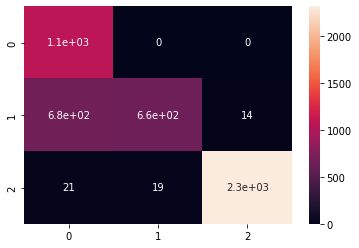

In [46]:
sns.heatmap(cm, annot=True)

In [47]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.61      1.00      0.76      1077
           1       0.97      0.49      0.65      1348
           2       0.99      0.98      0.99      2360

    accuracy                           0.85      4785
   macro avg       0.86      0.82      0.80      4785
weighted avg       0.90      0.85      0.84      4785



In [48]:
print("accuracy : ", model.score(x_test,y_test))

accuracy :  0.8472309299895506


In [49]:
import pickle
Pkl_Filename = "model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model, file)

In [50]:
#load back
with open(Pkl_Filename, 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)
Pickled_LR_Model

AdaBoostClassifier(random_state=0)